# Optimizing the Eggholder function with PSO

The Eggholder function is defined as

$f(x,y) = -(y+47) \; sin \; \sqrt{|\frac{x}{2} + (y+47)|} \;  - \; x \; sin \; \sqrt{|x - (y+47)|}$

and expresses a complicated function with many local minima, but only one global minimum:


![](Eggholder_function.jpg)


* Global minimum: $f(512, 404.2319) = - 959.6407$
* Search domain: $-512 \leq x,y \geq 512$


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Optimizing the function 
For now, let's try some arbitrary parameters and the standard GlobalBestPSO optimization method.
We can then see and find out if and which local minima was found.

In [2]:
%%time
# Set up hyperparameters:
## c1 = cognitive parameter (follow its personal best position)
## c2 = social parameter    (follow the swarm's global best position)
## w = inertia parameter    (controls the inertia of the swarm's movement)

options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO:
## n_particles = number of particles in the swarm
## dimensions = number of dimensions in the space
## dimensions = number of dimensions in the space
## bounds = bounds of the search domain [(Min_x, Min_y), (Max_x, Max_y)]
## init_pos = option to explicitly set the particles’ initial positions (None: generate the particles randomly)

optimizer = ps.single.GlobalBestPSO(n_particles=20, 
                                    dimensions=2,
                                    bounds=[(-512, -512), (512, 512)],
                                    options=options,
                                    init_pos=None)

# Perform optimization:
## objective_func = objective function to be evaluated
## iter = number of iterations
## n_processes = number of processes to use for parallel particle evaluation
## verbose = enable or disable the logs and progress bar

cost, pos = optimizer.optimize(objective_func=fx.eggholder, 
                               iters=50)

2020-06-20 13:55:26,551 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-786
2020-06-20 13:55:26,640 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -785.5177140342894, best pos: [-454.61896331 -381.51603899]


CPU times: user 86.1 ms, sys: 19.5 ms, total: 106 ms
Wall time: 94.4 ms


One can see that the optimizer finds a solution close to the global minima despite many local minima.

## Plotting the cost history

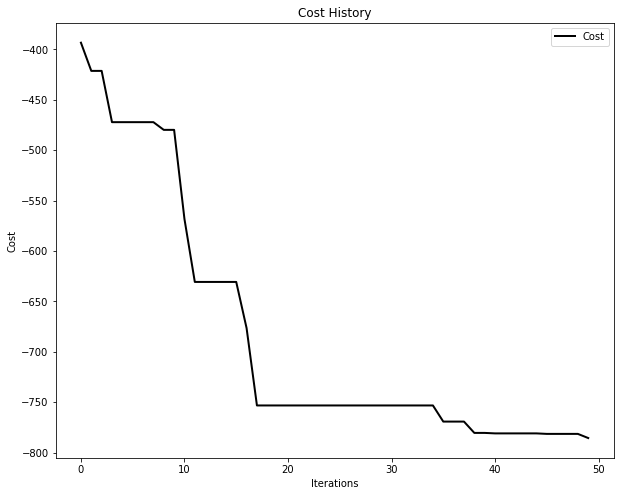

In [3]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

## Visualization of the optimization

In [4]:
# This class enables drawing a surface plot of a given objective function
from pyswarms.utils.plotters.formatters import Mesher

In [5]:
# Initialize mesher:
## func = objective function to plot a surface of
## limits = the range, in each axis, where the mesh will be drawn
## levels = levels on which the contours are shown

m = Mesher(func=fx.eggholder, 
           limits=[(-512,512),(-512,512)], 
           levels=np.arange(-1000.0, 1000.0, 50))

### Plotting in 2D-space

In [6]:
%%capture
# Make animation:
## pos_history = position history of the swarm 
## mesher = mesher class for mesh plots
## mark = marks a particular point with a red crossmark 

animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(512,404.2319))

MemoryError: Unable to allocate 7.63 TiB for an array with shape (1024000, 1024000) and data type float64

In [7]:
# Creates a GIF of the animation and enables us to view it in the notebook
animation.save('eggholder_plot_2d.gif', writer='imagemagick', fps=4)
Image(url='eggholder_plot_2d.gif')

NameError: name 'animation' is not defined

### Plotting in 3D-space

In [8]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d() method
# It requires a cost history obtainable from the optimizer class

pos_history_3d = m.compute_history_3d(optimizer.pos_history)

In [9]:
# Make a designer and set the x,y,z limits & label the three axes

from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-512,512), (-512,512), (-1000,1000)], 
             label=['x-axis', 'y-axis', 'z-axis'])

In [10]:
%%capture
# Make animation:
## pos_history = position history of the swarm
## mesher = mesher class for mesh plots
## designer = custom attributes
## mark = marks a particular point with a red crossmark 

animation3d = plot_surface(pos_history=pos_history_3d, 
                           mesher=m, 
                           designer=d,      
                           mark=(512,404.2319,- 959.6407))              

MemoryError: Unable to allocate 7.63 TiB for an array with shape (1024000, 1024000) and data type float64

In [11]:
# Creates a GIF of the animation and enables us to view it in the notebook
animation3d.save('eggholder_plot_3d.gif', writer='imagemagick', fps=4)
Image(url='eggholder_plot_3d.gif')

NameError: name 'animation3d' is not defined